In [16]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
import os
import control as ct

PATH = os.getcwd() + '/'

print(PATH)

/home/andre/Documents/Codes/Python/CONTROLE/


In [39]:
# Criacao para as variaveis simbolicas de tempo e Laplace (s)
t, s = sympy.symbols('t, s')

U_s = 2 / (s**2) * (s + 2.5)

display(U_s)

u_t = sympy.inverse_laplace_transform(U_s, s, t)

display(u_t)

2*(s + 2.5)/s**2

5.0*t*Heaviside(t) + 2.0*Heaviside(t)

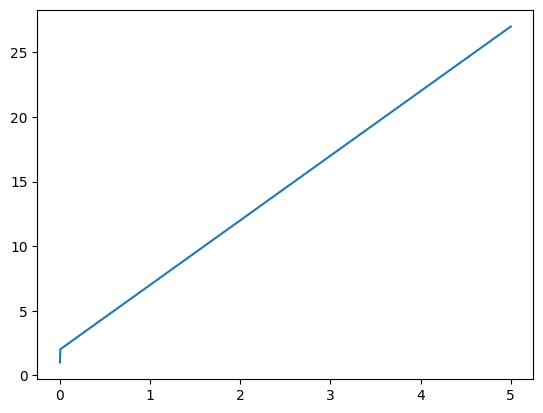

In [40]:
t_vect = np.linspace(0., 5., 1000)
resposta = np.zeros(len(t_vect))

for i in range(len(t_vect)):
  resposta[i] = u_t.subs(t, t_vect[i])

plt.plot(t_vect, resposta)
plt.show()


2.5 s + 5
---------
   s^2



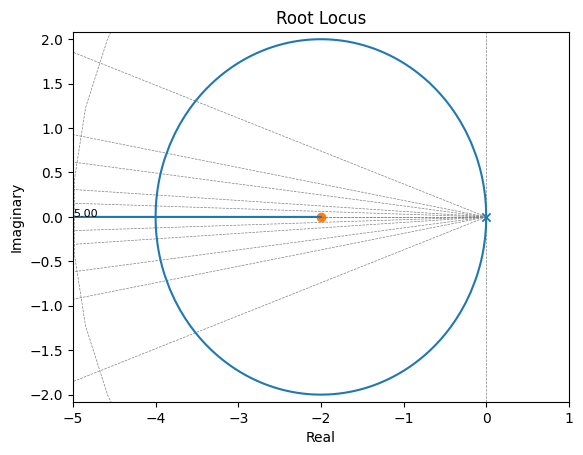

In [26]:
num = [2.5, 5]
den = [1,0,0]
G = ct.TransferFunction(num, den)

print(G)
rlist, klist = ct.rlocus(G)

plt.xlim(-5, 1)

plt.show()


      1
-------------
s^2 + 2 s + 1



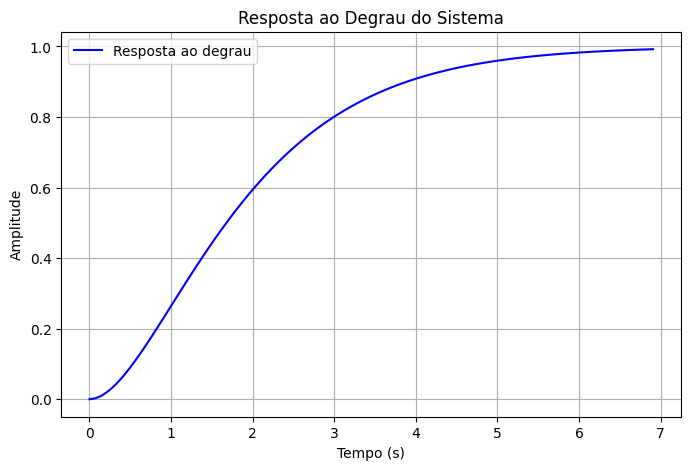

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definindo a função de transferência do sistema
# G(s) = 1 / (s^2 + 2s + 1)
numerador = [1]
denominador = [1,2,1]
sistema = ctrl.TransferFunction(numerador, denominador)

print(sistema)

# Simulando a resposta ao degrau
tempo, resposta = ctrl.step_response(sistema)

# Plotando a resposta
plt.figure(figsize=(8, 5))
plt.plot(tempo, resposta, label='Resposta ao degrau', color='blue')
plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


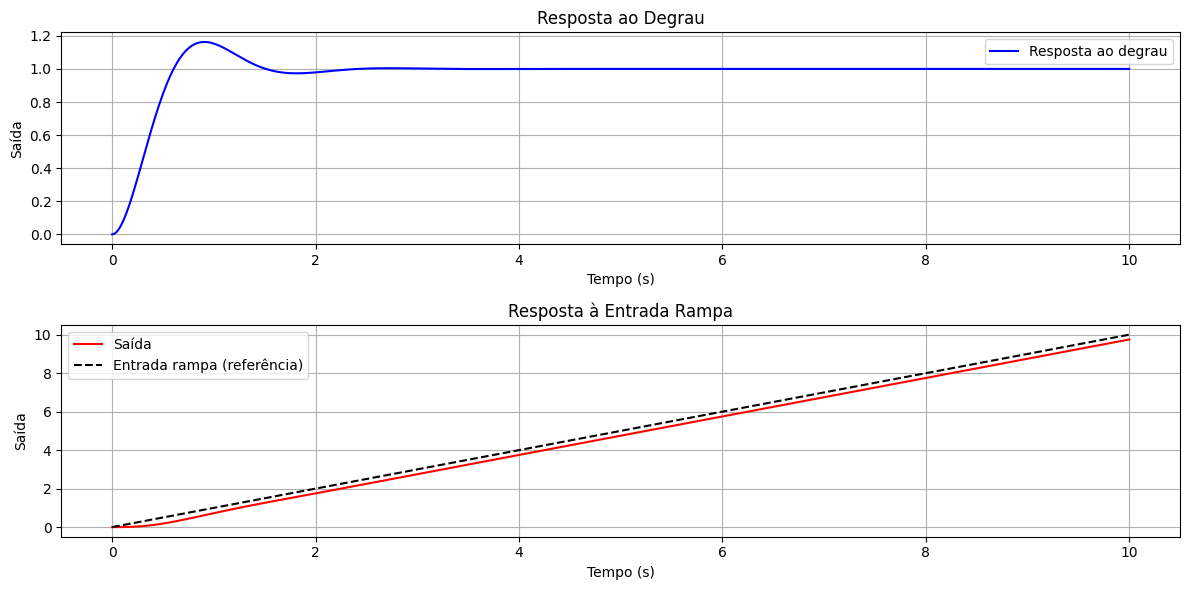

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step, lsim

# Definição do controlador ajustado Gc(s) e sistema em malha aberta
K = 1.6
numerator = [16]       # Numerador de Gc(s) ajustado (16)
denominator = [1, 4, 0]  # Denominador de Gc(s) ajustado (s^2 + 4s)

# Função de transferência em malha aberta
G_open = TransferFunction(numerator, denominator)

# Função de transferência em malha fechada
G_closed = TransferFunction(numerator, [1, 4, 16])

# Simulação da resposta ao degrau
t = np.linspace(0, 10, 500)
t_step, y_step = step(G_closed, T=t)

# Simulação da entrada rampa
u_ramp = t  # Entrada rampa
t_ramp, y_ramp, _ = lsim(G_closed, U=u_ramp, T=t)

# Plotar os resultados
plt.figure(figsize=(12, 6))

# Resposta ao degrau
plt.subplot(2, 1, 1)
plt.plot(t_step, y_step, label="Resposta ao degrau", color="b")
plt.title("Resposta ao Degrau")
plt.xlabel("Tempo (s)")
plt.ylabel("Saída")
plt.grid()
plt.legend()

# Resposta à entrada rampa
plt.subplot(2, 1, 2)
plt.plot(t_ramp, y_ramp, label="Saída", color="r")
plt.plot(t_ramp, u_ramp, '--', label="Entrada rampa (referência)", color="k")
plt.title("Resposta à Entrada Rampa")
plt.xlabel("Tempo (s)")
plt.ylabel("Saída")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
